# Les équation différentiel ordinaire (O.D.E.)

## Rappel sur les O.D.E.

Les équation différentielles ordinaire sont les équations vérifiant :

$$a_N(x)*\frac{d^Ny(x)}{dx^N}+a_{N-1}(x)*\frac{d^{N-1}y(x)}{dx^{N-1}}+...+a_{N-n}(x)*\frac{d^{N-n}y(x)}{dx^{N-n}}+...+a_{1}(x)*\frac{dy(x)}{dx}+a_0(x)*y(x)=f(x)$$

L'ordre de l'équation correspond au nombre de dérivé utilisé pour l'exprimer et  ne dépendent que d'une seule variable.

Ces équations sont le  plus souvent non résoluble de manière analytique, c'est pourquoi on va s'interesser aux méthodes d'aproximation afin d'obtenir des  réssultats proches de la "réalité".

Vous ssavez normalement résoudre les équations dites linéaires, où $f(x)=Constane$.

## Une première approche à l'ordre 1

Soit un E.D.O. de la forme :

$$
\begin{cases}
    a_{1}(x)*\frac{dy(x)}{dx}+a_0(x)*y(x)=f(x)\\
    y(0)= B
\end{cases}
$$

Cette  dernière nous informe sur la nature de la dérvié et les conditions initiales, nous allons utilisé cette dérivé pour approximé la valeur suivante à celle donnée initialement afin de reconstruire une courbe avec un pas **dx** choisi.

Sous cette forme la dérivé n'esst pas isolé, nous allons donc isoler la dérivé :

$$
y' =\frac{dy(x)}{dx} = \frac{f(x)}{a_{1}(x)}-a_0(x)*y(x)
$$

Puis nous utiliserons cette dernière pour déterminer le prochain point à partir des Conditions  Initiales :
- $y_{n=0} = A$
- $y_{n+1} = y_{n}+y'_{n}*dx$

Cette première approche est la méthode d'Euler explicite.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def euler_explicite(func_derivate,
                    x0, y0,
                    dx, xmax):
    x_range = np.arange(x0,xmax,dx)
    y_range = np.zeros(x_range.shape)
    for idx, value in enumerate(x_range):
        #condition initial
        if idx == 0:
            y_range[0]=y0
        else:
            y_range[idx] = y_range[idx-1]+func_derivate(x_range[idx-1],y_range[idx-1])*dx
            
    return x_range, y_range
            

### Cas pratique 1

$$
\begin{cases}
    \frac{dy}{dx}+2y=2cos(x)  \\
    y(0)= 0 
\end{cases}
$$

On isole la dérivé : 

$$
\frac{dy}{dx}=2cos(x)-2y
$$

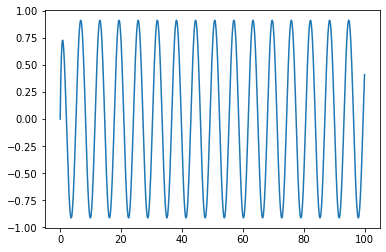

In [3]:
def derivate_0(x,y):
    return 2*np.cos(x)-2*y

x,y = euler_explicite(derivate_0,
                      0,0,
                      0.1,100)
plt.figure()
plt.plot(x,y)
plt.show()

### Cas pratique 2

$$
\begin{cases}
    RC.\frac{du(t)}{dt}+u(t)= e^{-t}  \\
    u(0)= 5 
\end{cases}
$$

On isole la dérivé : 

$$
\frac{du(t)}{dt}=\frac{e^{-t}}{RC} - \frac{u(t)}{RC} = \frac{1}{RC}.(e^{-t}-u(t))
$$


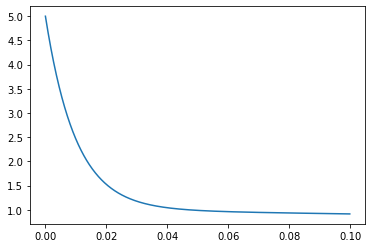

In [5]:
R = 10000
C = 1e-6
E = 5
tau=R*C

def derivate_1(x,y):
    return (1/(R*C))*(np.exp(-x)-y)

x,y = euler_explicite(derivate_1,0,5,0.0001,10*tau)
plt.figure()
plt.plot(x,y)
plt.show()

### Cas pratique 3 : Etude de la divergence avec résolution analytique

Pour ce cas on va utiliser le système suivant :

$$
\begin{cases}
    50.\frac{di(t)}{dt}+i(t)= 0  \\
    i(0)= 5
\end{cases}
$$

on isole la dérivé :
$$
\frac{di(t)}{dt}= -\frac{i(t)}{50}
$$

Dont on connait la résolution numérique :
$$
i(t) = A.e^{c.t}+B
\begin{cases}
i(\inf) = B = 0\\
i(0)=  5 = A+B ;  A=5\\
c= -1/50
\end{cases}
$$
Soit $i(t)=5e^{-\frac{t}{50}}$

No handles with labels found to put in legend.


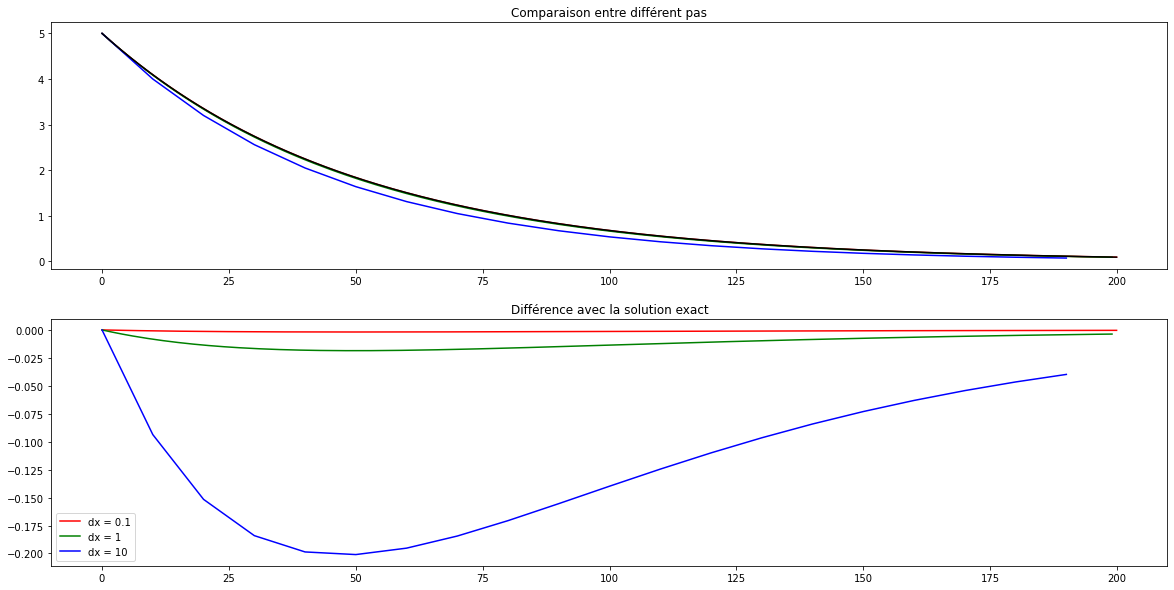

In [6]:
def exact_func(t):
    return 5*np.exp(-t/50)

def derivate_func(t,y):
    return -y/50

x_0 = 0
y_0 = 5

dx_1 = 0.1
dx_2 = 1
dx_3 = 10

N = 200

x1,y1 = euler_explicite(derivate_func,x_0,y_0,dx_1,N)
x2,y2 = euler_explicite(derivate_func,x_0,y_0,dx_2,N)
x3,y3 = euler_explicite(derivate_func,x_0,y_0,dx_3,N)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))
ax[0].set_title("Comparaison entre différent pas")
ax[0].plot(x1,y1,color="r",label=f"dx = {dx_1}")
ax[0].plot(x2,y2,color="g",label=f"dx = {dx_2}")
ax[0].plot(x3,y3,color="b",label=f"dx = {dx_3}")
ax[0].plot(x1,exact_func(x1),color="black")
plt.legend()
ax[1].set_title("Différence avec la solution exact")
ax[1].plot(x1,y1-exact_func(x1),color="r",label=f"dx = {dx_1}")
ax[1].plot(x2,y2-exact_func(x2),color="g",label=f"dx = {dx_2}")
ax[1].plot(x3,y3-exact_func(x3),color="b",label=f"dx = {dx_3}")
plt.legend()
plt.show()

### Exercice pratique 

Dévellopez la fonction dérivé correspondant aux sstème suivant :

$$
\begin{cases}
    12.\frac{dy}{dx}+9.y=2.cos(x)*e^{-\frac{x}{20}}  \\
    y(0)= 0.2
\end{cases}
$$

Puis utiliser la fonction *Euler_explicit()* pour résoudre ce système avec différent pas.

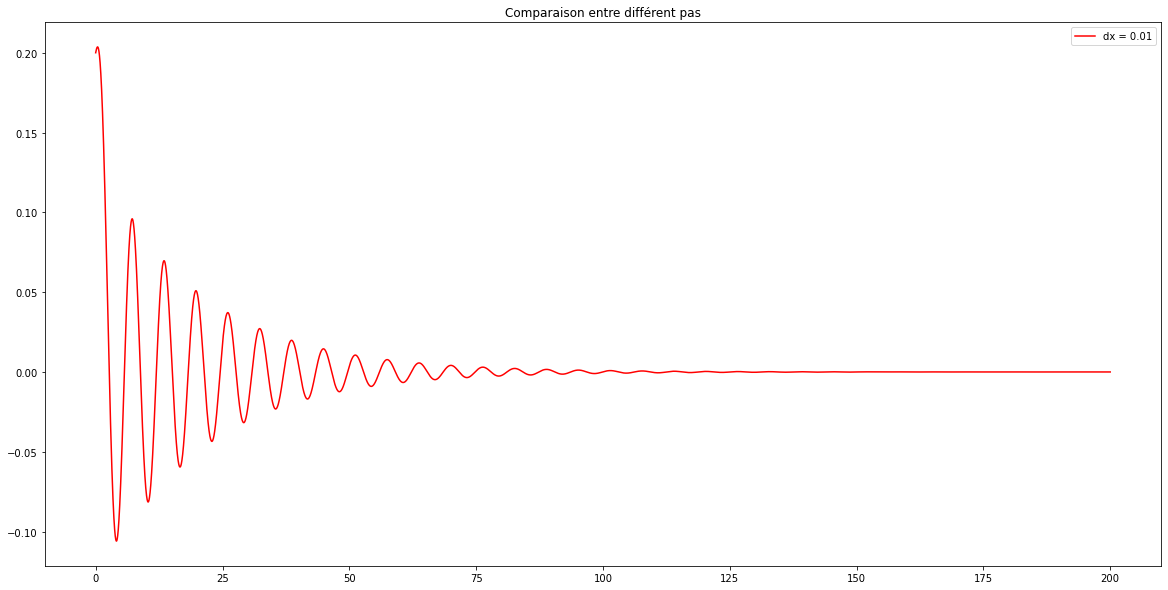

In [10]:
# Partie à completer =>
def derivate_3(x,y):
    return ((2*np.cos(x)*np.exp(-x/20))/12)-(9*y/12)
# <= Partie à completer 

x_0 = 0
y_0 = 0.2

dx_1 = 0.01
dx_2 = 1
dx_3 = 100

N = 200

x1,y1 = euler_explicite(derivate_3,x_0,y_0,dx_1,N)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
ax.set_title("Comparaison entre différent pas")
ax.plot(x1,y1,color="r",label=f"dx = {dx_1}")
# ax[0].plot(x1,exact_func(x1),color="black")
plt.legend()
plt.show()

## Euler Implicite

